## 10. Egyéb, máshova nem sorolható funkciók

### Config
A programban lehetőség van konfigurálni (egyelőre még kevés) beállítást. Ilyen pl. a `precision`. Ez azt szabja meg, hogy a megjelenő számok hány tizedesjegyig legyenek kiírva. Ennek bemutatására gyorsan létrehozok egy interferogramot, majd koszinusz-függvény illesztésével kiértékelem.


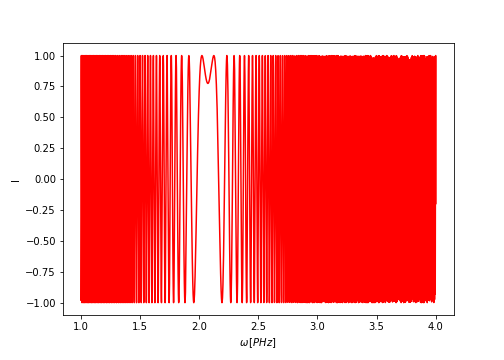

In [1]:
import pysprint as ps

g = ps.Generator(1, 4, 3, delay=500, GD=0, GDD=540, normalize=True)
g.generate()

ifg = ps.CosFitMethod(*g.data)
ifg

In [2]:
ifg.GD_lookup(3, engine="normal")

The predicted GD is ± 505.74801 fs based on reference point of 3.00000.


A konfigurációt egy különleges `with` contextmanagerrel tudjuk módosítani a következőképpen:
```python
with ps.config.setting("beallitas_neve", beallitas_erteke):
    ...
```
Az eredményeket most 8 tizedesjegyig szeretném megkapni, így a futtatni kívánt kódot a `with` blokk belsejébe írom.

Working... /

c:\program files\python37\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Working... /

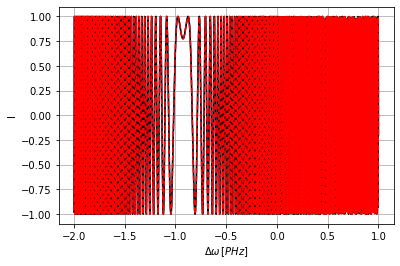

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
with ps.config.setting("precision", 8):
    ifg.optimizer(reference_point=3, order=2, initial_region_ratio=0.01, extend_by=0.01);

Futtatva ugyan ezt a `with` contextmanageren kívül már az alapértelmezett 5 tizedesjegyet használja a program:

Working... \

c:\program files\python37\lib\site-packages\scipy\optimize\minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Working... -

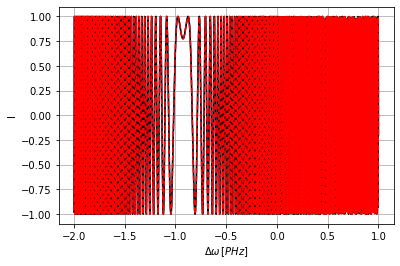

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
ifg.optimizer(reference_point=3, order=2, initial_region_ratio=0.01, extend_by=0.01);

Ez a konfigurációs beállítás (majdnem) az összes kiírt szám - beleérve a fájlba írt logokat is - tizedesjegyeinek számát szabályozza.

### Mérési eredmény megadása, ha a szórás ismeretlen

A programba beépített függvénnyel lehetőség van az

<font size="3">
$X = \overline{x}_n \, \pm \, \frac{t_{N-1}}{\sqrt{N}}\sigma_{N-1}$
</font>

képlettel adott mérési eredmény kiszámolására a következő módon:    

In [5]:
import numpy as np
from pysprint.utils import measurement

# a mérési eredményeink
x = np.array([1.00, 1.10, 1.05, 0.79, 1.12])

# a függvény hívása 95%-os szignifikancia szint mellett
measurement(x, confidence=0.95);

<IPython.core.display.Math object>

### CLI, sablonok

A program telepítésével egy CLI, azaz Command Line Interface is telepítésre kerül. Ez a terminál/parancssor/Anaconda Prompt segítségével elérhető. A fő funkciója az, hogy sablonokat tud generálni az adott kiértékelési módszerhez, és ezt nem kell mindig újból beírni. Itt a munkafüzetben a `!`-lel érhető el a terminál. Generáljunk egy WFT kiértékeléshez tartozó sablont:

In [7]:
!python -m pysprint --template wft

Created template wft-2020-10-06-08-16.py at C:\pyt\PySprint\doc


Attól függően, hogy hogyan települt a program a `python -m` előtag elhagyható. Ez a következő fájlt generálta:

In [8]:
!type wft-2020-10-06-08-16.py

## PySprint generated template file
## Created at : 2020-10-06 08:16:47.086916
## Method used here : WFTMethod

import numpy as np
import matplotlib.pyplot as plt
import pysprint as ps

# -----------------------------LOADING DATA-----------------------------------

ifg = ps.WFTMethod.parse_raw(
    "ifg_file.txt", 
    skiprows=0,
    decimal=".",
    sep=None,
    delimiter=None,
    comment=None,
    usecols=None,
    names=None,
    swapaxes=False,
    na_values=None,
    skip_blank_lines=True,
    keep_default_na=False,
    meta_len=1
)

# -----------------------------PREPROCESSING-----------------------------------

## change range if needed
# ifg.chrange(current_unit, target_unit)

## change to frequency domain if needed
# ifg.chdomain()

## slice domain if needed
# ifg.slice(start, stop)

## Optionally plot the interferogram
# ifg.plot()
# ifg.show()

# ------------------------------CALCULATION------------------------------------
## safely remove everything to ensure proper wind

A `wft` mellett a `cff`, `spp`, `mm`, és `fft` kulcsszavakkal generálható a megfelelő sablon fájl.